# Data Analysis Tools Week 4

In [1]:
!pip install pandas seaborn matplotlib scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import scipy

data4 = pd.read_csv('./gapminder.csv', low_memory=False)

data4['internetuserate'] = pd.to_numeric(data4['internetuserate'], errors='coerce')
data4['incomeperperson'] = pd.to_numeric(data4['incomeperperson'], errors='coerce')
data4['employrate'] = pd.to_numeric(data4['employrate'], errors='coerce')

Remove any missing values and conduct a simple regression analysis to examine the relationship between the employment rate and the rate of internet use.

In [3]:
data_clean_change = data4.dropna()
# Perform ANOVA, Chi-Square Test or correlation coefficient that includes a moderator
scipy.stats.pearsonr(data_clean_change['employrate'], data_clean_change['internetuserate'])

PearsonRResult(statistic=-0.20084402120259578, pvalue=0.009916806362522807)

Sort countries into three income groups: Low, Mid, and High; and print the counts in each group

In [4]:
def incomegrpfun (row):
    if row['incomeperperson'] <= 744.239:
        return 1
    elif row['incomeperperson'] <= 9425.326:
        return 2
    elif row['incomeperperson'] > 9425.326:
        return 3

pd.options.mode.chained_assignment = None 
data_clean_change['incomegrpfun'] = data_clean_change.apply (lambda row: incomegrpfun (row),axis=1)
 
chk1 = data_clean_change['incomegrpfun'].value_counts(sort=False, dropna=False)
chk1

incomegrpfun
2    79
3    40
1    45
Name: count, dtype: int64

Create dataframes containing these subgroups of income

In [5]:
clean_sub1_ch = data_clean_change[(data_clean_change['incomegrpfun']== 1)]
clean_sub2_ch = data_clean_change[(data_clean_change['incomegrpfun']== 2)]
clean_sub3_ch = data_clean_change[(data_clean_change['incomegrpfun']== 3)]

Association between employrate and internetuserate for LOW income countries

In [6]:
scipy.stats.pearsonr(clean_sub1_ch['employrate'], clean_sub1_ch['internetuserate'])

PearsonRResult(statistic=-0.27422129575405607, pvalue=0.06832051283344731)

Association between employrate and internetuserate for MIDDLE income countries'

In [7]:
scipy.stats.pearsonr(clean_sub2_ch['employrate'], clean_sub2_ch['internetuserate'])

PearsonRResult(statistic=-0.21047736108645934, pvalue=0.06262271129345785)

Association between employrate and internetuserate for HIGH income countries'

In [8]:
scipy.stats.pearsonr(clean_sub3_ch['employrate'], clean_sub3_ch['internetuserate'])

PearsonRResult(statistic=0.3507277477872907, pvalue=0.026495462291722217)

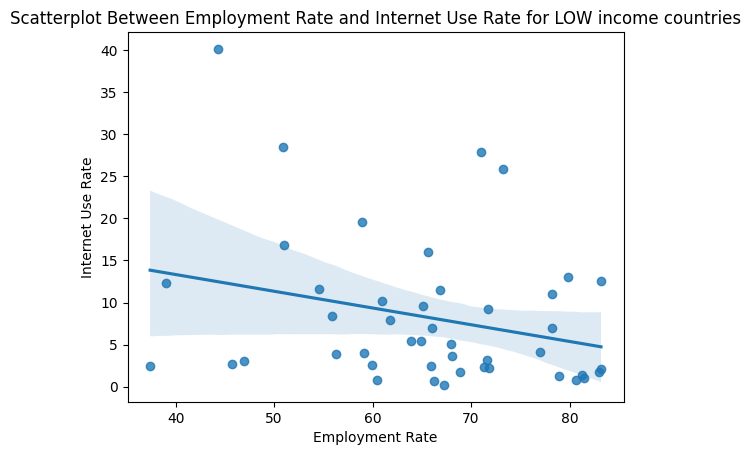

In [9]:
scat1_change = sns.regplot(x="employrate", y="internetuserate", data=clean_sub1_ch)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot Between Employment Rate and Internet Use Rate for LOW income countries')
plt.show()

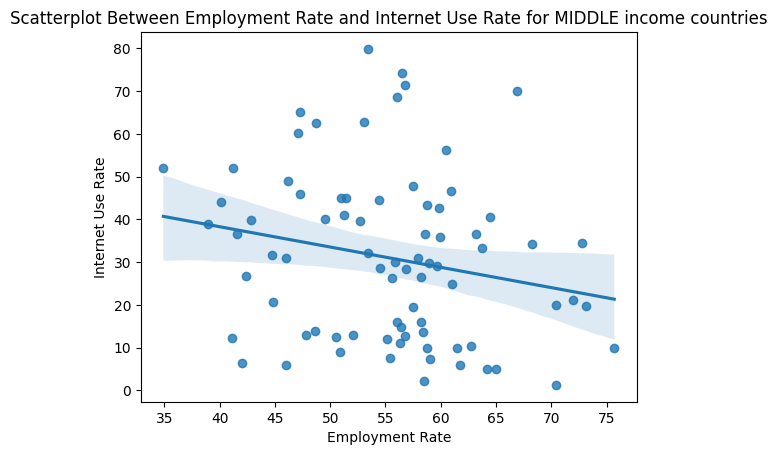

In [10]:
scat2_change = sns.regplot(x="employrate", y="internetuserate", data=clean_sub2_ch)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot Between Employment Rate and Internet Use Rate for MIDDLE income countries')
plt.show()

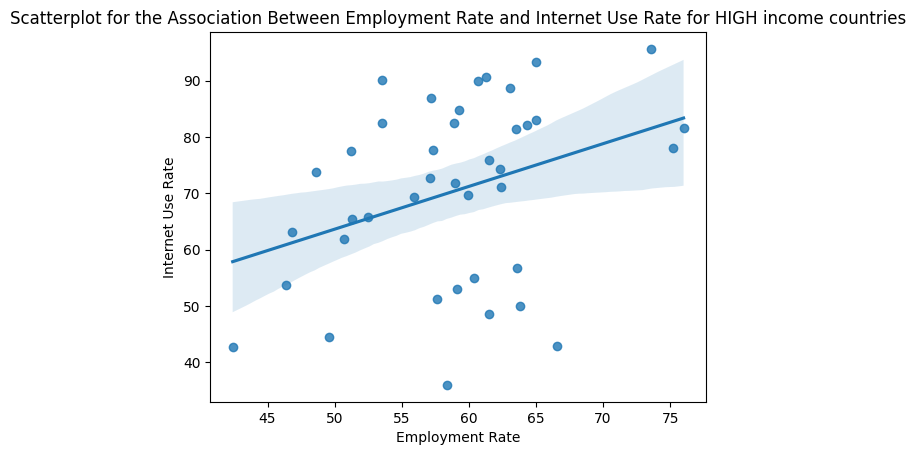

In [11]:
scat3_change = sns.regplot(x="employrate", y="internetuserate", data=clean_sub3_ch)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for HIGH income countries')
plt.show()

As anticipated, the correlation between the employment rate and internet use rate in Low-income countries is not significant, as indicated by a p-value of 0.0683, surpassing our predefined threshold of 0.05. However, for Mid- and High-income countries, the correlation shows statistical significance, with p-values of 0.0431 and 0.0273, respectively. Interestingly, the relationship observed in Mid-income countries is inverse compared to that of High-income countries. The correlation coefficient for Mid-income countries is -0.237, whereas for High-income countries, it is +0.390. This discrepancy is intriguing and suggests that internet use may have a beneficial impact on employment in High-income countries if the pattern holds true.